# GRIP @ The Sparks Foundation

# Author- Kajal Kourani ( Data Science & Business Analytics Intern )
# Task 6 : Prediction Using Decision Tree Algorithm

### ( Level - Intermediate )
## Problem Statement

1. Create the Decision Tree classifier and visualize it graphically.
2. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

# Import all the required libraries

In [1]:
import sklearn.datasets as datasets
import pandas as pd

# Loading the dataset and print head of the dataset

In [2]:
dataSet=datasets.load_iris()
df=pd.DataFrame(dataSet.data, columns=dataSet.feature_names)
print(df.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


# Check the shape of the data

In [3]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

# Check the information of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# Overall description of dataset

In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Check corelation between columns

In [6]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


# Print features and lables

In [11]:
X = df
Y = dataSet.target
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Split the dataset in training & testing dataset

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Train the model on train dataset

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print('Model trained successfully!')

Model trained successfully!


# Define prediction variable y_prediction

In [15]:
y_predict = dtree.predict(X_test)
y_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

# Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)

# Print the overall report of matix 

In [17]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_predict,digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      0.938     1.000     0.968        15
           2      1.000     0.938     0.968        16

    accuracy                          0.980        50
   macro avg      0.979     0.979     0.978        50
weighted avg      0.981     0.980     0.980        50



# Visual Representation

[Text(0.5416666666666666, 0.9285714285714286, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]\nclass = versicolor'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = setosa'),
 Text(0.625, 0.7857142857142857, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]\nclass = versicolor'),
 Text(0.4166666666666667, 0.6428571428571429, 'petal length (cm) <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]\nclass = versicolor'),
 Text(0.3333333333333333, 0.5, 'sepal length (cm) <= 4.95\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]\nclass = versicolor'),
 Text(0.16666666666666666, 0.35714285714285715, 'petal width (cm) <= 1.35\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = 

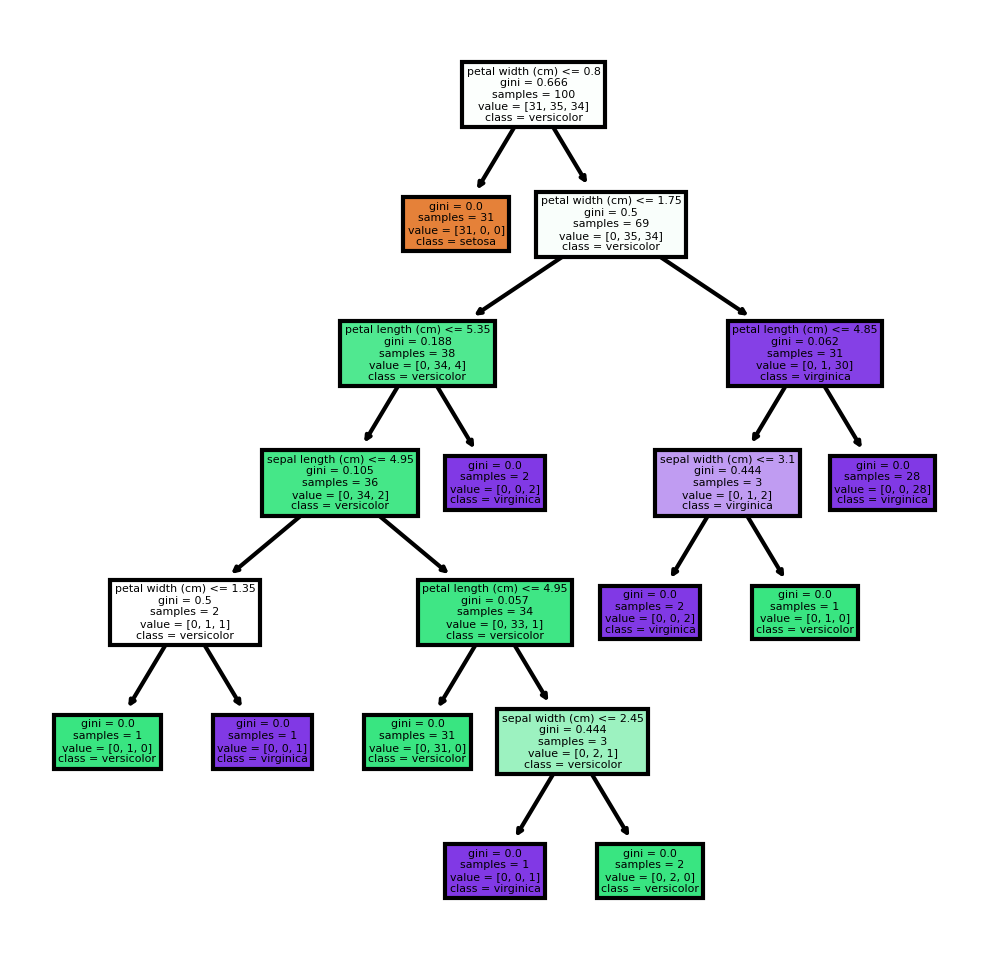

In [18]:
from sklearn import tree
import matplotlib.pyplot as plt

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(dtree, feature_names = fn, class_names = cn, filled = True)

# Conclusion -

#### I have successfully implemented the decision tree algorithm on given IRIS dataset.
#### Now, If we feed any new data to this classifier, it would be able to predict the right class accordingly.

# Task 6 Completed Successfully
# Thank You